# Project 3: House Price Prediction

Objective: Predict house prices based on various features like location, size, and house
characteristics.

## Imports

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

We will open the .csv file to perform exploratory data analysis (EDA) to understand the dataset and
visualize trends.

In [22]:
#df = pd.read_csv("./data/house_prices.csv")
df = pd.read_csv("cleaned_house_data.csv")
df = df.drop(['Unnamed: 0'], axis=1)

In [23]:
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,Property_Sale_Price_natural_log
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216


## Data Description

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dwell_Type                       1459 non-null   int64  
 1   Zone_Class                       1459 non-null   object 
 2   LotFrontage                      1459 non-null   float64
 3   LotArea                          1459 non-null   int64  
 4   Road_Type                        1459 non-null   object 
 5   Property_Shape                   1459 non-null   object 
 6   LandContour                      1459 non-null   object 
 7   Utilities                        1459 non-null   object 
 8   LotConfig                        1459 non-null   object 
 9   LandSlope                        1459 non-null   object 
 10  Neighborhood                     1459 non-null   object 
 11  Condition1                       1459 non-null   object 
 12  Condition2          

In [25]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [26]:
df_nums.columns

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price',
       'Property_Sale_Price_natural_log'],
      dtype='object')

In [27]:
df_objs.columns

Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
df.select_dtypes(include='object')

,Zone_Class,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NotExist,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,NotExist,Attchd,Unf,TA,TA,Y,WD,Normal


In [9]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1459 non-null   int64  
 1   Dwell_Type                       1459 non-null   int64  
 2   LotFrontage                      1200 non-null   float64
 3   LotArea                          1459 non-null   int64  
 4   OverallQual                      1459 non-null   int64  
 5   OverallCond                      1459 non-null   int64  
 6   YearBuilt                        1459 non-null   int64  
 7   YearRemodAdd                     1459 non-null   int64  
 8   MasVnrArea                       1451 non-null   float64
 9   BsmtFinSF1                       1459 non-null   int64  
 10  BsmtFinSF2                       1459 non-null   int64  
 11  BsmtUnfSF                        1459 non-null   int64  
 12  TotalBsmtSF         

In [18]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Zone_Class      1459 non-null   object
 1   Road_Type       1459 non-null   object
 2   Property_Shape  1459 non-null   object
 3   LandContour     1459 non-null   object
 4   Utilities       1459 non-null   object
 5   LotConfig       1459 non-null   object
 6   LandSlope       1459 non-null   object
 7   Neighborhood    1459 non-null   object
 8   Condition1      1459 non-null   object
 9   Condition2      1459 non-null   object
 10  Dwelling_Type   1459 non-null   object
 11  HouseStyle      1459 non-null   object
 12  RoofStyle       1459 non-null   object
 13  RoofMatl        1459 non-null   object
 14  Exterior1st     1459 non-null   object
 15  Exterior2nd     1459 non-null   object
 16  MasVnrType      1459 non-null   object
 17  ExterQual       1459 non-null   object
 18  ExterCon

### percentage of null and nan

In [29]:
((df_nums.isnull() | df_nums.isna()).sum() * 100 / df_nums.index.size).round(2).sort_values(ascending=False)

Dwell_Type                         0.0
LotFrontage                        0.0
LotArea                            0.0
OverallQual                        0.0
OverallCond                        0.0
YearBuilt                          0.0
YearRemodAdd                       0.0
MasVnrArea                         0.0
BsmtFinSF1                         0.0
BsmtFinSF2                         0.0
BsmtUnfSF                          0.0
TotalBsmtSF                        0.0
1stFlrSF                           0.0
2ndFlrSF                           0.0
LowQualFinSF                       0.0
GrLivArea                          0.0
BsmtFullBath                       0.0
BsmtHalfBath                       0.0
FullBath                           0.0
HalfBath                           0.0
BedroomAbvGr                       0.0
KitchenAbvGr                       0.0
TotRmsAbvGrd                       0.0
Fireplaces                         0.0
GarageYrBlt                        0.0
GarageCars               

In [30]:
((df_objs.isnull() | df_objs.isna()).sum() * 100 / df_objs.index.size).round(2).sort_values(ascending=False)

Zone_Class        0.0
Road_Type         0.0
Property_Shape    0.0
LandContour       0.0
Utilities         0.0
LotConfig         0.0
LandSlope         0.0
Neighborhood      0.0
Condition1        0.0
Condition2        0.0
Dwelling_Type     0.0
HouseStyle        0.0
RoofStyle         0.0
RoofMatl          0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          0.0
BsmtCond          0.0
BsmtExposure      0.0
BsmtFinType1      0.0
BsmtFinType2      0.0
Heating           0.0
HeatingQC         0.0
CentralAir        0.0
Electrical        0.0
KitchenQual       0.0
Functional        0.0
FireplaceQu       0.0
GarageType        0.0
GarageFinish      0.0
GarageQual        0.0
GarageCond        0.0
PavedDrive        0.0
SaleType          0.0
SaleCondition     0.0
dtype: float64

In [14]:
df_nums.corr()['Property_Sale_Price'].sort_values(ascending=False)

Property_Sale_Price    1.000000
OverallQual            0.790982
GrLivArea              0.708624
GarageCars             0.640409
GarageArea             0.623431
TotalBsmtSF            0.613581
1stFlrSF               0.605852
FullBath               0.560664
TotRmsAbvGrd           0.533723
YearBuilt              0.522897
YearRemodAdd           0.507101
GarageYrBlt            0.486362
MasVnrArea             0.477493
Fireplaces             0.466929
BsmtFinSF1             0.386420
LotFrontage            0.351799
WoodDeckSF             0.324413
2ndFlrSF               0.319334
OpenPorchSF            0.315856
HalfBath               0.284108
LotArea                0.263843
BsmtFullBath           0.227122
BsmtUnfSF              0.214479
BedroomAbvGr           0.168213
ScreenPorch            0.111447
PoolArea               0.092404
MoSold                 0.046432
3SsnPorch              0.044584
BsmtFinSF2            -0.011378
BsmtHalfBath          -0.016844
MiscVal               -0.021190
Id      

In [31]:
df_nums.corr()['Property_Sale_Price'].sort_values()

KitchenAbvGr                      -0.135935
EnclosedPorch                     -0.128627
Dwell_Type                        -0.084230
OverallCond                       -0.077924
YrSold                            -0.028907
LowQualFinSF                      -0.025620
MiscVal                           -0.021200
BsmtHalfBath                      -0.016873
BsmtFinSF2                        -0.011412
3SsnPorch                          0.044571
MoSold                             0.046380
PoolArea                           0.092397
ScreenPorch                        0.111419
BedroomAbvGr                       0.168235
BsmtUnfSF                          0.214446
BsmtFullBath                       0.227082
GarageYrBlt                        0.261413
LotArea                            0.263837
HalfBath                           0.284400
OpenPorchSF                        0.315831
2ndFlrSF                           0.319464
WoodDeckSF                         0.324422
LotFrontage                     

In [32]:
#display rows of null columns
null_mask = df['PoolQC'].isnull() #.any(axis=1)
null_rows = df[null_mask]

print(null_rows)

KeyError: 'PoolQC'

In [17]:
#test corr of pool QC 
test_pool = df[["PoolQC","Property_Sale_Price"]]
test_pool["PoolQC"].fillna("No", inplace = True)
X = pd.get_dummies(test_pool, dtype='int')
X.corr()['Property_Sale_Price']
# weak correlation between Property_Sale_Price and PoolQC so it is better to drop

/tmp/ipykernel_3275/978537921.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_pool["PoolQC"].fillna("No", inplace = True)
/tmp/ipykernel_3275/978537921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pool["PoolQC"].fillna("No", inplace = True)


Property_Sale_Price    1.000000
PoolQC_Ex              0.144146
PoolQC_Fa              0.016127
PoolQC_Gd              0.012038
PoolQC_No             -0.093708
Name: Property_Sale_Price, dtype: float64

In [78]:
#display rows of null columns
null_mask = df['MiscFeature'].isnull() #.any(axis=1)
null_rows = df[null_mask]

print(null_rows)

        Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0        1          60         RL         65.0     8450      Pave   NaN   
1        2          20         RL         80.0     9600      Pave   NaN   
2        3          60         RL         68.0    11250      Pave   NaN   
3        4          70         RL         60.0     9550      Pave   NaN   
4        5          60         RL         84.0    14260      Pave   NaN   
...    ...         ...        ...          ...      ...       ...   ...   
1454  1455          20         FV         62.0     7500      Pave  Pave   
1455  1456          60         RL         62.0     7917      Pave   NaN   
1456  1457          20         RL         85.0    13175      Pave   NaN   
1458  1459          20         RL         68.0     9717      Pave   NaN   
1459  1460          20         RL         75.0     9937      Pave   NaN   

     Property_Shape LandContour Utilities  ... PoolArea PoolQC  Fence  \
0               Reg       

In [18]:
#test corr of MiscFeature 
test = df[["MiscFeature","Property_Sale_Price"]]
test["MiscFeature"].fillna("No", inplace = True)
X = pd.get_dummies(test, dtype='int')
X.corr()['Property_Sale_Price']
# weak correlation between Property_Sale_Price and MiscFeature so it is better to drop

/tmp/ipykernel_3275/2489684963.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["MiscFeature"].fillna("No", inplace = True)
/tmp/ipykernel_3275/2489684963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["MiscFeature"].fillna("No", inplace = True)


Property_Sale_Price    1.000000
MiscFeature_Gar2      -0.004744
MiscFeature_No         0.072298
MiscFeature_Othr      -0.040538
MiscFeature_Shed      -0.069771
MiscFeature_TenC       0.022773
Name: Property_Sale_Price, dtype: float64

In [80]:
#display rows of null columns
null_mask = df['Alley'].isnull() #.any(axis=1)
null_rows = df[null_mask]

print(null_rows)

        Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0        1          60         RL         65.0     8450      Pave   NaN   
1        2          20         RL         80.0     9600      Pave   NaN   
2        3          60         RL         68.0    11250      Pave   NaN   
3        4          70         RL         60.0     9550      Pave   NaN   
4        5          60         RL         84.0    14260      Pave   NaN   
...    ...         ...        ...          ...      ...       ...   ...   
1455  1456          60         RL         62.0     7917      Pave   NaN   
1456  1457          20         RL         85.0    13175      Pave   NaN   
1457  1458          70         RL         66.0     9042      Pave   NaN   
1458  1459          20         RL         68.0     9717      Pave   NaN   
1459  1460          20         RL         75.0     9937      Pave   NaN   

     Property_Shape LandContour Utilities  ... PoolArea PoolQC  Fence  \
0               Reg       

In [19]:
#test corr of Alley 
test = df[["Alley","Property_Sale_Price"]]
test["Alley"].fillna("No", inplace = True)
X = pd.get_dummies(test, dtype='int')
X.corr()['Property_Sale_Price']
# weak correlation between Property_Sale_Price and PoolQC so it is better to drop


/tmp/ipykernel_3275/1190793610.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["Alley"].fillna("No", inplace = True)
/tmp/ipykernel_3275/1190793610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Alley"].fillna("No", inplace = True)


Property_Sale_Price    1.000000
Alley_Grvl            -0.139195
Alley_No               0.123611
Alley_Pave            -0.027655
Name: Property_Sale_Price, dtype: float64

In [85]:
#display rows of null columns
null_mask = df['Fence'].isnull() #.any(axis=1)
null_rows = df[null_mask]

print(null_rows)

        Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0        1          60         RL         65.0     8450      Pave   NaN   
1        2          20         RL         80.0     9600      Pave   NaN   
2        3          60         RL         68.0    11250      Pave   NaN   
3        4          70         RL         60.0     9550      Pave   NaN   
4        5          60         RL         84.0    14260      Pave   NaN   
...    ...         ...        ...          ...      ...       ...   ...   
1453  1454          20         RL         90.0    17217      Pave   NaN   
1454  1455          20         FV         62.0     7500      Pave  Pave   
1455  1456          60         RL         62.0     7917      Pave   NaN   
1458  1459          20         RL         68.0     9717      Pave   NaN   
1459  1460          20         RL         75.0     9937      Pave   NaN   

     Property_Shape LandContour Utilities  ... PoolArea PoolQC Fence  \
0               Reg        

In [20]:
#test corr of Fence
test = df[["Fence","Property_Sale_Price"]]
test["Fence"].fillna("No", inplace = True)
X = pd.get_dummies(test, dtype='int')
X.corr()['Property_Sale_Price']
# weak correlation between Property_Sale_Price and PoolQC so it is better to drop

/tmp/ipykernel_3275/2187975147.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["Fence"].fillna("No", inplace = True)
/tmp/ipykernel_3275/2187975147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Fence"].fillna("No", inplace = True)


Property_Sale_Price    1.000000
Fence_GdPrv           -0.005152
Fence_GdWo            -0.100047
Fence_MnPrv           -0.140613
Fence_MnWw            -0.051164
Fence_No               0.172184
Name: Property_Sale_Price, dtype: float64

In [87]:
#display rows of null columns
null_mask = df['MasVnrType'].isnull() #.any(axis=1)
null_rows = df[null_mask]

print(null_rows)

        Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
1        2          20         RL         80.0     9600      Pave   NaN   
3        4          70         RL         60.0     9550      Pave   NaN   
5        6          50         RL         85.0    14115      Pave   NaN   
8        9          50         RM         51.0     6120      Pave   NaN   
9       10         190         RL         50.0     7420      Pave   NaN   
...    ...         ...        ...          ...      ...       ...   ...   
1454  1455          20         FV         62.0     7500      Pave  Pave   
1455  1456          60         RL         62.0     7917      Pave   NaN   
1457  1458          70         RL         66.0     9042      Pave   NaN   
1458  1459          20         RL         68.0     9717      Pave   NaN   
1459  1460          20         RL         75.0     9937      Pave   NaN   

     Property_Shape LandContour Utilities  ... PoolArea PoolQC  Fence  \
1               Reg       

In [21]:
#test corr of MasVnrType 
test = df[["MasVnrType","Property_Sale_Price"]]
test["MasVnrType"].fillna("No", inplace = True)
X = pd.get_dummies(test, dtype='int')
X.corr()['Property_Sale_Price']
# weak correlation between Property_Sale_Price and PoolQC so it is better to drop

/tmp/ipykernel_3275/1676487350.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["MasVnrType"].fillna("No", inplace = True)
/tmp/ipykernel_3275/1676487350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["MasVnrType"].fillna("No", inplace = True)


Property_Sale_Price    1.000000
MasVnrType_BrkCmn     -0.044394
MasVnrType_BrkFace     0.198191
MasVnrType_No         -0.367456
MasVnrType_Stone       0.330476
Name: Property_Sale_Price, dtype: float64

<Axes: xlabel='Feature', ylabel='Coefficient'>

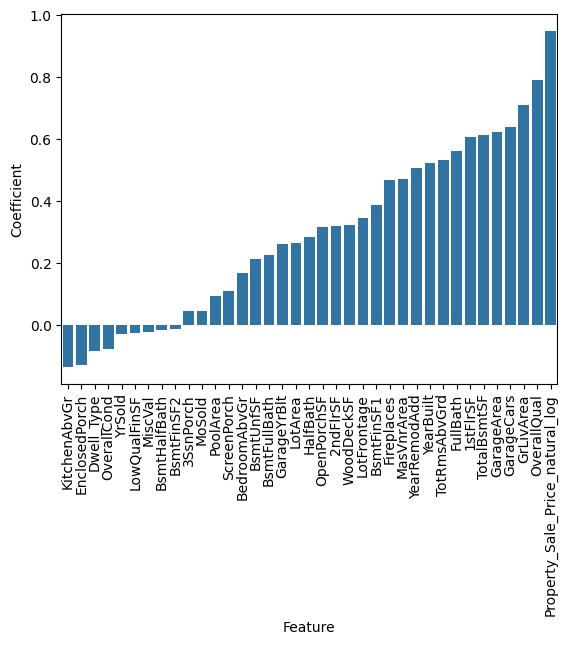

In [33]:
#draw the correlation of numerical features
coef_df = pd.DataFrame({
    'Feature': df_nums.columns,
    'Coefficient': df_nums.corr()['Property_Sale_Price']
})
coef_df = coef_df.sort_values(by=['Coefficient'])
coef_df.drop(labels=["Property_Sale_Price"], axis=0, inplace = True)
plt.xticks(rotation=90)
sns.barplot(x='Feature', y='Coefficient', data=coef_df)

<Axes: xlabel='Property_Sale_Price', ylabel='Density'>

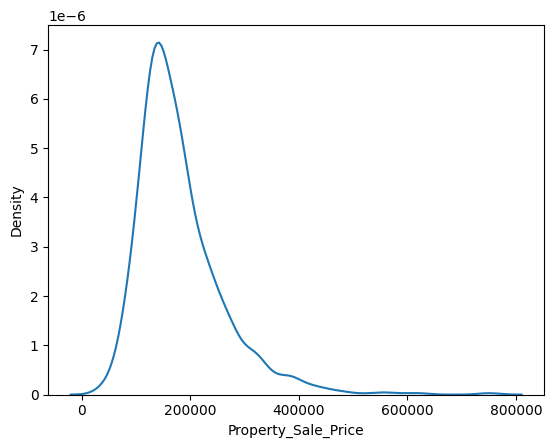

In [35]:
#Distribution of Property_Sale_Price
sns.kdeplot(df['Property_Sale_Price'])

In [36]:
from dash import Dash
from dash import dcc, html
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate

import plotly.express as px

In [37]:

app = Dash(__name__)

# App Layout
app.layout = html.Div([
    html.H3("Categorical Columns Analysis Graphs"),
    dcc.RadioItems(
        id="graph-RadioItems",
        options=[
            {'label': "Count Plot", 'value': "Count Plot"},
            {'label': "Scatter Plot", 'value': "Scatter Plot"},
            {'label': "Mean of Sale Price Plot", 'value': "Mean Count Plot"}
        ],
        value="Count Plot"
    ),
    dcc.Dropdown(
        id="Y Column Picker",
        options=[{'label': col, 'value': col} for col in df_objs.columns],
        value="Zone_Class"
    ),
    dcc.Graph(id="graph")    
])

# App Callback
@app.callback(
    Output("graph", "figure"),
    [Input("graph-RadioItems", "value"),
     Input("Y Column Picker", "value")]
)
def plot_graph(graph_type, column):
    if graph_type == "Count Plot":
        df_mean = df.groupby(column).agg({'Id': 'count'}).reset_index()
        fig = px.bar(df_mean, x=column, y='Id')
        #fig = px.bar(df_objs, x=column)
    elif graph_type == "Scatter Plot":
        df_data = pd.DataFrame({
            'x': df_objs[column],
            'y': df_nums['Property_Sale_Price']
        })
        fig = px.scatter(x=df_data['x'], y=df_data['y'])
    elif graph_type == "Mean Count Plot":
        df_mean = df.groupby(column).agg({'Property_Sale_Price': 'mean'}).reset_index()
        fig = px.bar(df_mean, x=column, y='Property_Sale_Price')
    else:
        fig = {}

    return fig

# Run the server
if __name__ == '__main__':
    app.run_server(mode="inline")

[2024-10-10 10:02:27,110] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/ReemGamal/miniconda3/envs/ml/lib/python3.9/site-packages/flask/app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/ReemGamal/miniconda3/envs/ml/lib/python3.9/site-packages/flask/app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/ReemGamal/miniconda3/envs/ml/lib/python3.9/site-packages/flask/app.py", line 880, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/ReemGamal/miniconda3/envs/ml/lib/python3.9/site-packages/flask/app.py", line 865, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
  File "/home/ReemGamal/miniconda3/envs/ml/lib/python3.9/site-packages/dash/dash.py", line 1376, in dispatch
    ctx.run(
  File "/home/ReemGamal/miniconda3/envs/ml/lib/python3.9/site-packag

In [38]:
app = Dash(__name__)

app.layout = html.Div([
    html.H3("Numeric Columns Analysis Graphs"),
    dcc.RadioItems(
        id="graph-RadioItems",
        options=[
            {'label': "Box Plot", 'value': "Box Plot"},
            {'label': "Distribution", 'value': "Distribution"},
            {'label': "Line Plot", 'value': "Line Plot"}
        ],
        value="Box Plot"
    ),
    dcc.Dropdown(
        id="Y Column Picker",
        options=[{'label': col, 'value': col} for col in df_nums.columns],
        value="Dwell_Type"
    ),
    dcc.Graph(id="graph")    
])

@app.callback(
    Output("graph", "figure"),
    [Input("graph-RadioItems", "value"),
     Input("Y Column Picker", "value")]
)
def plot_graph(graph_type, column):
    if graph_type == "Box Plot":
        fig = px.box(df_nums, y=column)
    elif graph_type == "Distribution":
        fig = px.histogram(df_nums, x=column, nbins=50)
    elif graph_type == "Line Plot":
        fig = px.line(df_nums, x=column, y='Property_Sale_Price', markers=True)
    else:
        fig = {}  

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<Axes: >

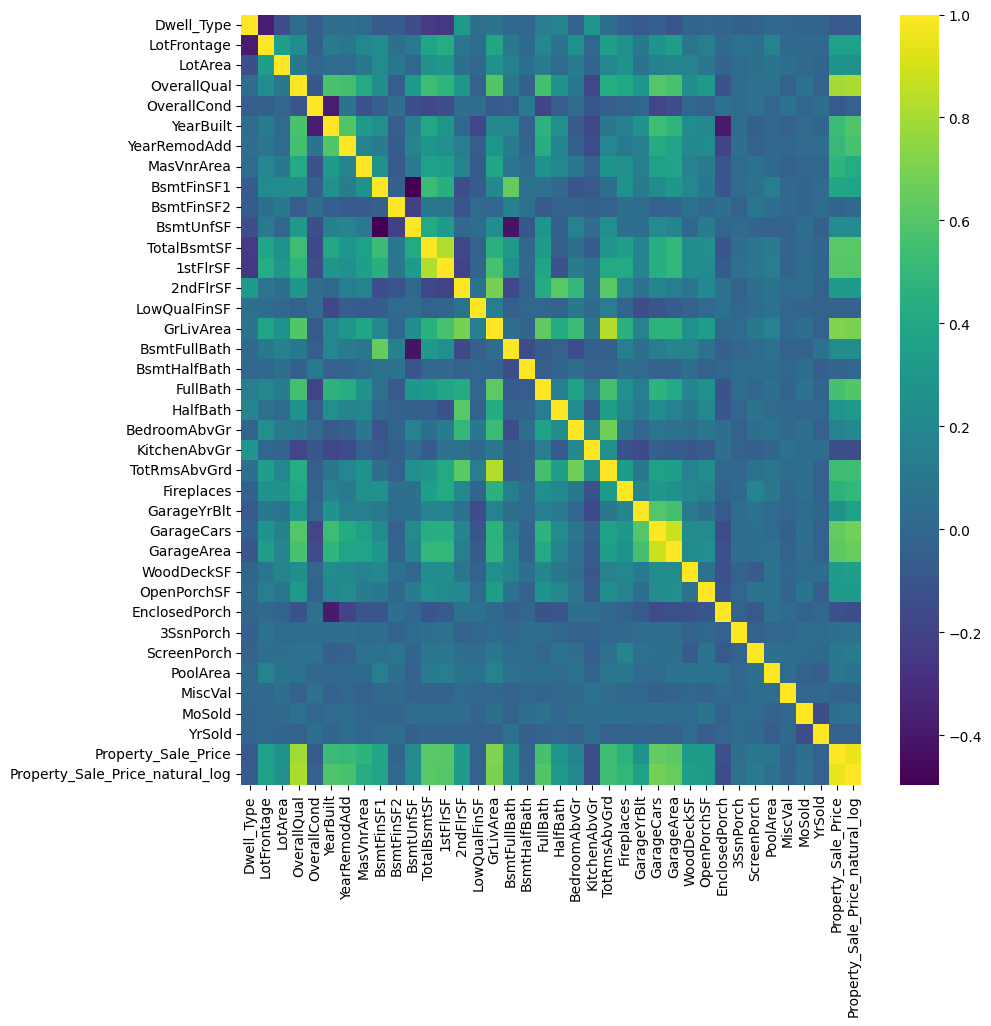

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))  # Set the figure size
sns.heatmap(df_nums.corr(), cmap="viridis" , ax=ax)

----